# Projet analyse de données

## Consignes:
Votre analyse sous forme de Jupyter Notebook déposé sur votre git en PUBLIC devra contenir:
* Une problématique pertinente (c-à-d ou il est possible de répondre avec des données)
* Au moins 1 diagramme avec données continues, type nuage de point ou histogramme
* Au moins 2 diagrammes avec des données discrètes
* Au moins 3 graphiques avec des données catégoriques
* 1 boîte à moustaches avec filtrage des données aberrantes sur le dataset (si il y en a)
* 1 heat map avec matrice de corrélation (si pertinent)
* Des commentaires clairs et pertinents pour chaque graphiques

## Problématique:

**Est-ce que le score est influencé par les caractéristiques physiques de l'athlète ?**

### Import des données

In [1]:
import pandas as pd
import seaborn as sb

In [95]:
games2019_athletes = pd.read_csv('/content/drive/MyDrive/Hitema/Datasets/crossfit-games-data/2019_games_athletes.csv')
#games2019_scores = pd.read_csv('/content/drive/MyDrive/Hitema/Datasets/crossfit-games-data/2019_games_scores.csv')

### Analyse des données

In [4]:
games2019_athletes

,height,affiliateid,countryoforiginname,weight,affiliatename,status,bibid,profilepics3key,competitorid,firstname,gender,age,lastname,countryoforigincode,competitorname,overallrank,overallscore,division
0,1.74,44632.0,United States,88.5,CrossFit Mayhem,ACT,016,9e218-P153604_4-184.jpg,153604,Mathew,M,29,Fraser,US,Mathew Fraser,1,984.0,Men
1,1.74,44800.0,United States,86.2,Peak 360 CrossFit,ACT,302,0a0bc-P2725_5-184.jpg,2725,Noah,M,28,Ohlsen,US,Noah Ohlsen,2,949.0,Men
2,1.55,44753.0,Iceland,83.9,CrossFit Hengill,ACT,122,4c5dc-P81616_4-184.jpg,81616,Björgvin Karl,M,26,Guðmundsson,IS,Björgvin Karl Guðmundsson,3,888.0,Men
3,1.80,44597.0,United States,84.8,CrossFit Mentality,ACT,105,e23e0-P34796_8-184.jpg,34796,Scott,M,31,Panchik,US,Scott Panchik,4,795.0,Men
4,1.55,44792.0,Australia,87.1,CrossFit Mode,ACT,303,b7c6d-P16080_7-184.jpg,16080,James,M,28,Newbury,AU,James Newbury,5,728.0,Men
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,1.65,44947.0,United States,71.2,CrossFit Uncommon,ACT,610,433bb-P198927_3-184.jpg,198927,Julie,X,62,Holt,US,Julie Holt,6,380.0,Women (60+)
390,1.62,44856.0,United States,53.1,Reebok CrossFit Medfield,ACT,605,a6012-P312883_7-184.jpg,312883,Carol Lynn,X,62,Thistle,US,Carol Lynn Thistle,7,310.0,Women (60+)
391,1.25,44782.0,United States,50.8,Ft. Wright CrossFit,ACT,607,0b3ce-P32842_4-184.jpg,32842,Elizabeth,X,62,Cole,US,Elizabeth Cole,8,290.0,Women (60+)
392,1.68,44821.0,Canada,57.2,CrossFit Living The Dream Ajax,ACT,606,10f1f-P702085_9-184.jpg,702085,Christine,X,60,Long,CA,Christine Long,9,250.0,Women (60+)


Le jeu de données étudié contient un échantillon de 394 individus présentés en fonction de 18 caractéristiques.

In [32]:
games2019_athletes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   height               394 non-null    float64
 1   affiliateid          357 non-null    float64
 2   countryoforiginname  394 non-null    object 
 3   weight               394 non-null    float64
 4   affiliatename        357 non-null    object 
 5   status               394 non-null    object 
 6   bibid                394 non-null    object 
 7   profilepics3key      394 non-null    object 
 8   competitorid         394 non-null    int64  
 9   firstname            394 non-null    object 
 10  gender               394 non-null    object 
 11  age                  394 non-null    int64  
 12  lastname             394 non-null    object 
 13  countryoforigincode  393 non-null    object 
 14  competitorname       394 non-null    object 
 15  overallrank          394 non-null    obj

En observant les caractéristiques liées aux athlètes, on constate que certaines permettent d'établir des catégories et de les regrouper par le statut, le genre, l'âge, la pays d'origine et la division

In [92]:
games2019_athletes.division.unique().tolist()

['Men',
 'Women',
 'Men (35-39)',
 'Women (35-39)',
 'Men (40-44)',
 'Women (40-44)',
 'Men (45-49)',
 'Women (45-49)',
 'Men (50-54)',
 'Women (50-54)',
 'Men (55-59)',
 'Women (55-59)',
 'Men (60+)',
 'Women (60+)']

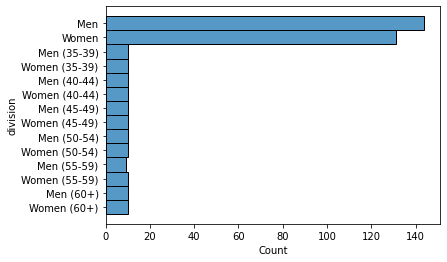

In [104]:
sb.histplot(data=games2019_athletes, y='division')

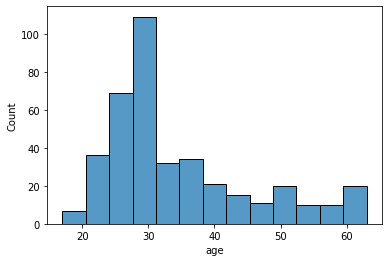

In [74]:
sb.histplot(data=games2019_athletes, x="age")

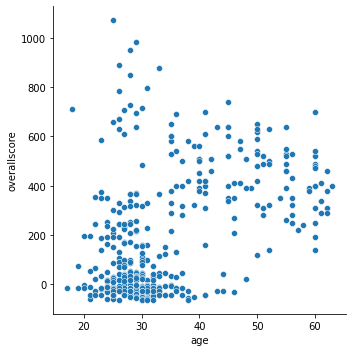

In [75]:
sb.relplot(data=games2019_athletes, x="age", y="overallscore")

In [50]:
games2019_athletes.groupby(by='division').size()

division
Men              144
Men (35-39)       10
Men (40-44)       10
Men (45-49)       10
Men (50-54)       10
Men (55-59)        9
Men (60+)         10
Women            131
Women (35-39)     10
Women (40-44)     10
Women (45-49)     10
Women (50-54)     10
Women (55-59)     10
Women (60+)       10
dtype: int64